###使用 Logistic regression 預測 Titanic 乘客的存活機率
陳俊宏

##讀入資料
使用pandas套件的read_csv()方法讀入資料集。

In [161]:
import pandas as pd

# 讀入資料
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)
 
# 看看資料 前十項
titanic_train.head(10) # 發現 Age,Cabin 有 NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##變數的意義
詳細請到[Data - Titanic: Machine Learning from Disaster ]了解變數的意義
[Data - Titanic: Machine Learning from Disaster ]:https://www.kaggle.com/c/titanic/data   "Data - Titanic"

In [162]:
#描述性統計
titanic_train.describe() # 發現 Age 只有714筆與其他項目891筆資料不同

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##填補年齡的遺漏值

我們使用中位數來填補Age變數的遺漏值


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


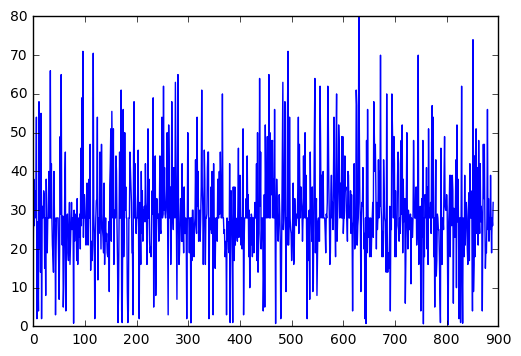

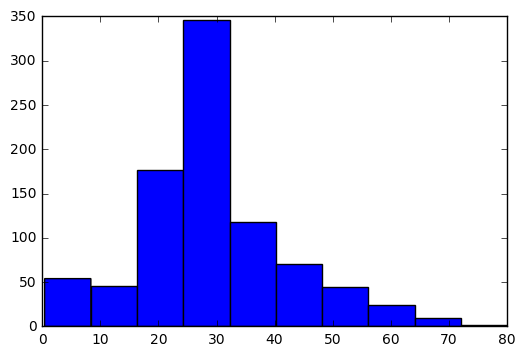

In [163]:
import numpy as np
import matplotlib.pyplot as plt

age_median = np.nanmedian(titanic_train["Age"]) # 要忽略 NaN
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age
print(titanic_train.describe())
plt.plot(titanic_train["Age"])
plt.show()
plt.hist(titanic_train["Age"])
plt.show()

##建立 dummy varuables

Logistic迴歸必須要將類別變數轉換成dummy variables。

In [164]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])
encoded_Pclass = label_encoder.fit_transform(titanic_train["Pclass"])

##建立X與y

In [165]:
titanic_X = pd.DataFrame([encoded_Pclass,
                          encoded_Sex,
                          new_Age,
                          titanic_train["Fare"],
                          titanic_train["SibSp"],
                          titanic_train["Parch"]
]).T

titanic_y = titanic_train["Survived"]

In [166]:
#切分訓練與測試資料
#利用70%30%比例切分訓練與測試資料
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(titanic_X, titanic_y, test_size = 0.3)

##建立 Logistic 迴歸模型
我們使用 Pclass，Sex，Age，Fare，SibSp，與Parch來預測 Survived。

In [169]:
from sklearn import metrics, linear_model

# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, train_y)

# 預測
test_y_predicted = logistic_regr.predict(test_X)

# 準確率
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.820895522388


##應用模型在沒有答案的資料

In [170]:
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_test.csv"
to_submit = pd.read_csv(url)

# 跟訓練資料作一樣的整理
encoded_Sex_to_submit = label_encoder.fit_transform(to_submit["Sex"])
encoded_Pclass_to_submit = label_encoder.fit_transform(to_submit["Pclass"])
age_median = np.nanmedian(to_submit["Age"]) # 要忽略 NaN
imputed_Age = np.where(to_submit["Age"].isnull(), age_median, to_submit["Age"])
encoded_Fare_to_submit = label_encoder.fit_transform(to_submit["Fare"])
encoded_SibSp_to_submit = label_encoder.fit_transform(to_submit["SibSp"])
encoded_Parch_to_submit = label_encoder.fit_transform(to_submit["Parch"])

to_submit_X = pd.DataFrame([encoded_Sex_to_submit,
                            encoded_Pclass_to_submit,
                            imputed_Age,
                            encoded_Fare_to_submit,
                            encoded_SibSp_to_submit,
                            encoded_Parch_to_submit,

]).T

# 預測
to_submit_y = logistic_regr.predict(to_submit_X)
print(to_submit_y)

# 準備要上傳的檔案
to_submit_dict = {
    "PassengerId": to_submit["PassengerId"],
    "Survived": to_submit_y
}
to_submit_df = pd.DataFrame(to_submit_dict)

# 輸出成 csv
to_submit_df.to_csv("to_submit.csv", index = False)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 0]


#試著使用DecisionTreeClassifier方法

In [179]:
import pandas as pd
from sklearn import tree
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn import metrics
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

age_median = np.nanmedian(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age

#若為男性為1，女性為2
new_Sex = np.where(titanic_train["Sex"] == "male", 1 , 2 )
titanic_train["Sex"] = new_Sex

#建立X與y
titanic_tree_X = pd.DataFrame([titanic_train["Pclass"],
                               titanic_train["Sex"],
                               titanic_train["Age"],
                               titanic_train["Fare"],
                               titanic_train["SibSp"],
                               titanic_train["Parch"]
]).T

titanic_tree_y = pd.DataFrame(titanic_train["Survived"])

#切分訓練與測試資料
rain_X, test_X, train_y, test_y = train_test_split(titanic_tree_X, titanic_tree_y, test_size = 0.3)

#建立分類器
clf = tree.DecisionTreeClassifier()
titanic_tree_clf = clf.fit(train_X,train_y)

#預測
test_y_predicted = titanic_tree_clf.predict(test_X)
print(test_y_predicted)

#準確率
accuracy = metrics.accuracy_score(test_y,test_y_predicted)
print(accuracy)


[0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0]
0.563432835821


#試著使用K-Nearest Neighbors

In [192]:
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics

url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

age_median = np.nanmedian(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age

#若為男性為1，女性為2
new_Sex = np.where(titanic_train["Sex"] == "male", 1 , 2 )
titanic_train["Sex"] = new_Sex

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])
encoded_Pclass = label_encoder.fit_transform(titanic_train["Pclass"])

#建立X與y
titanic_X = pd.DataFrame([encoded_Pclass,
                          encoded_Sex,
                          new_Age,
                          titanic_train["Fare"],
                          titanic_train["SibSp"],
                          titanic_train["Parch"]
]).T

titanic_y = pd.DataFrame(titanic_train["Survived"])
#切分訓練與測試資料
rain_X, test_X, train_y, test_y = train_test_split(titanic_X, titanic_y, test_size = 0.3)
#建立分類器
clf = neighbors.KNeighborsClassifier()
titanic_clf = clf.fit(train_X, train_y)
#預測
test_y_predicted = titanic_tree_clf.predict(test_X)
print(test_y_predicted)
#準確率
accuracy = metrics.accuracy_score(test_y,test_y_predicted)
print(accuracy)

[1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 0]
0.567164179104


C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
